In [1]:
!pip install -q pandas numpy tensorflow scikit-learn statsmodels matplotlib seaborn gradio torch timesfm
!pip install -q huggingface_hub tirex trl peft accelerate bitsandbytes tf-keras "transformers>=4.30.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

def Data_Analysis(path):
    # List all files
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                print(" -> Found CSV:", full_path)

    # Choose the correct CSV file path above and load
    file = full_path  # once identified
    df = pd.read_csv(file, encoding='latin-1')
    print("\nINFO:\n")
    print(df.info())
    print("\nDESCRIBE:\n")
    print(df.describe())
    print("\nSHAPE:\n")
    print(df.shape)
    print("\nCOLUMNS:\n")
    print(df.columns)
    print("\nDATA TYPES:\n")
    print(df.dtypes)
    print("\nUNIQUE VALUES:\n")
    print(df.nunique())
    print("\nHEAD:\n")
    print(df.head())
    print("\nTAIL\n:")
    print(df.tail())

Data_Analysis(path)

Path to dataset files: /kaggle/input/ecommerce-data
 -> Found CSV: /kaggle/input/ecommerce-data/data.csv

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

DESCRIBE:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         

In [ ]:
def data_cleaning(df):
    """
    Cleans the ecommerce data by handling null values, duplicates, and outliers.

    Args:
        df: pandas DataFrame containing the raw ecommerce data.

    Returns:
        pandas DataFrame: Cleaned DataFrame.
    """
    print("Original shape:", df.shape)

    ## Handle null values
    # Fill missing values in 'Description'
    mean_description = df['Description'].mean()
    df['Description'].fillna(mean_description, inplace=True)

    # Fill missing values in 'CustomerID
    mean_customer_id = df['CustomerID'].mean()
    df['CustomerID'].fillna(mean_customer_id, inplace=True)

    print("\nShape after handling null values:")
    print(df.isnull().sum())

    # Remove Duplicates
    initial_duplicates = df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    print(f"\nRemoved {initial_duplicates - df.duplicated().sum()} duplicate rows.")
    print("Shape after removing duplicates:", df.shape)

    # Handle inconsistencies
    # Remove rows with negative Quantity, as they are likely returns or errors
    df = df[df['Quantity'] > 0]
    # Remove rows with negative UnitPrice, as they are likely errors
    df = df[df['UnitPrice'] > 0]
    # Remove rows where InvoiceNo starts with 'C', which indicates cancellations
    df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

    print("\nShape after handling inconsistencies:", df.shape)

    # Remove outliers using IQR
    def remove_outliers_iqr(df, column):
        """Removes outliers from a specified column using the Interquartile Range (IQR) method."""
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df_cleaned

    # Apply outlier removal to numerical columns
    numerical_cols = ['Quantity', 'UnitPrice']
    for col in numerical_cols:
        initial_shape = df.shape
        df = remove_outliers_iqr(df, col)
        print(f"Shape after removing outliers from {col}: {df.shape}")

    print("\nShape after removing outliers from all numerical columns:", df.shape)

    return df

data_cleaning(df)

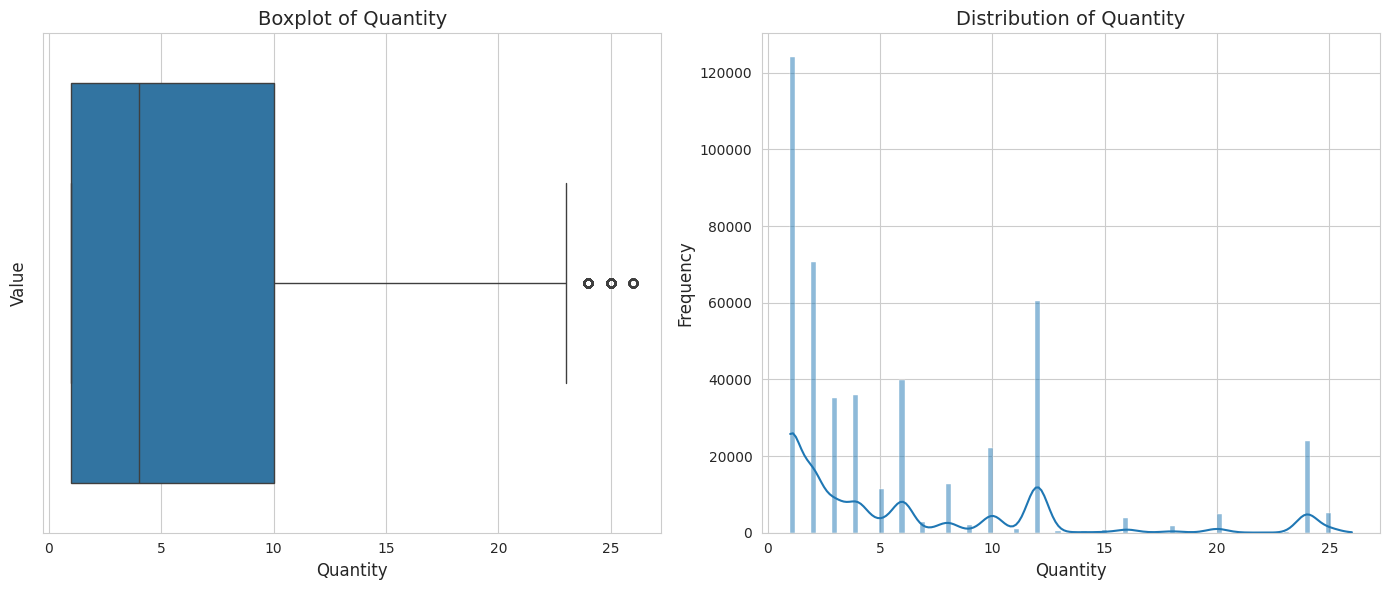

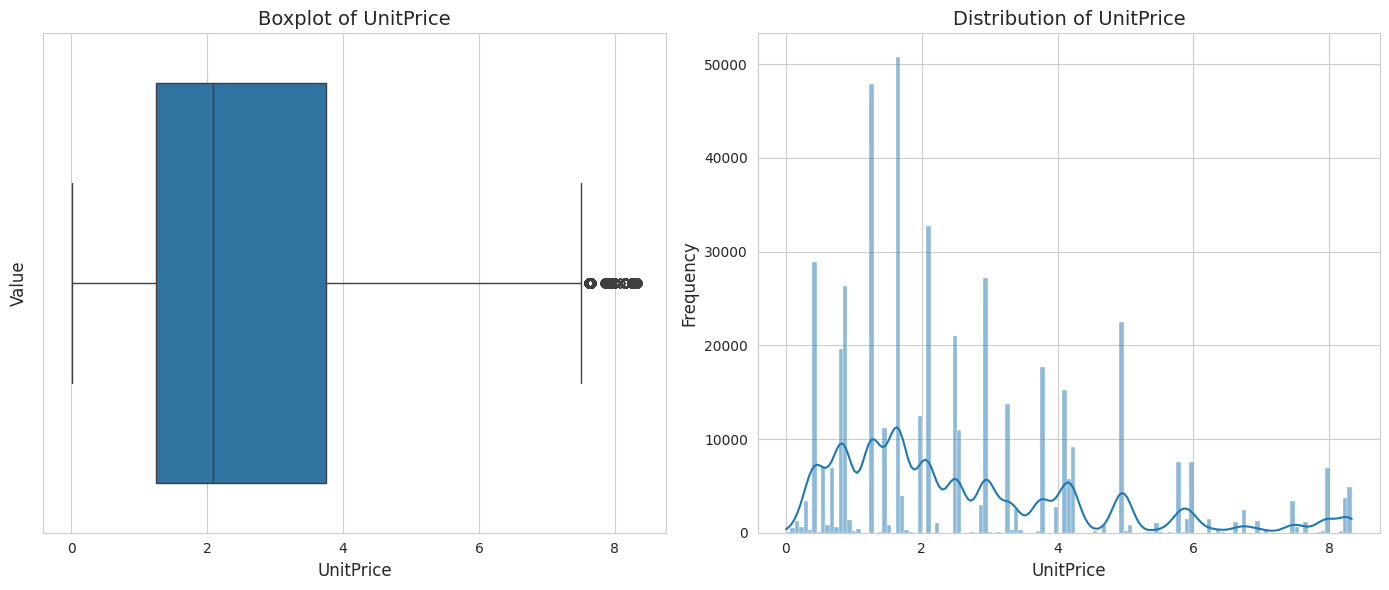

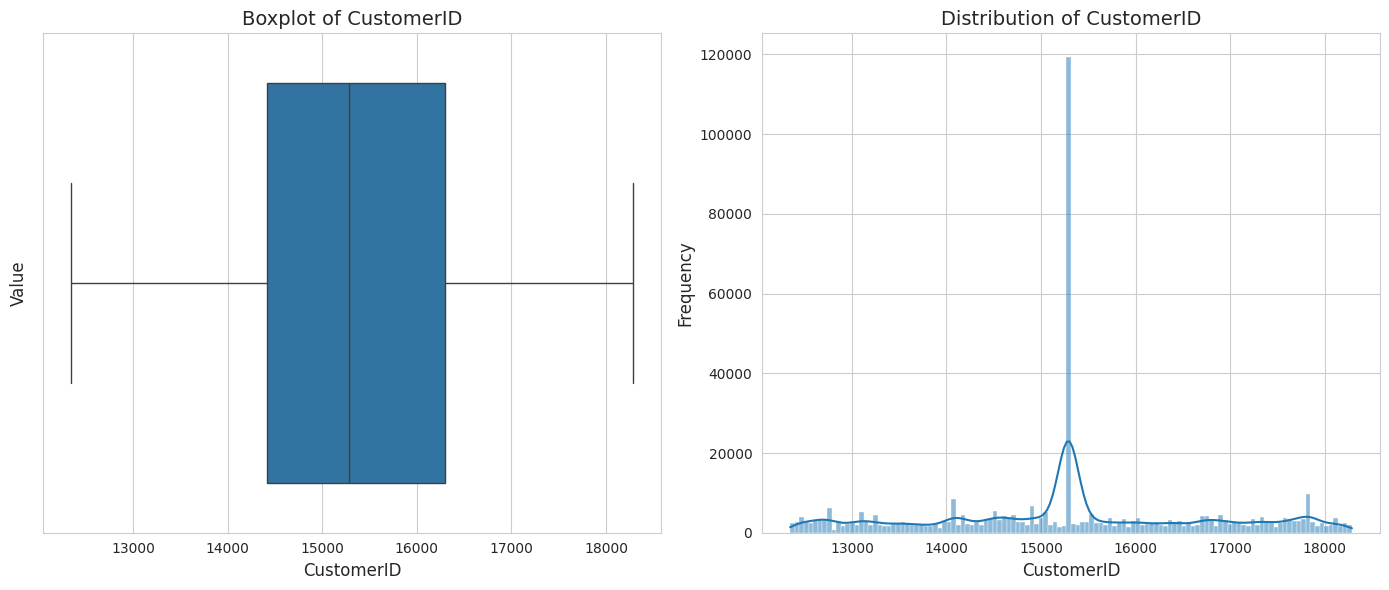

/tmp/ipython-input-10-3295214366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


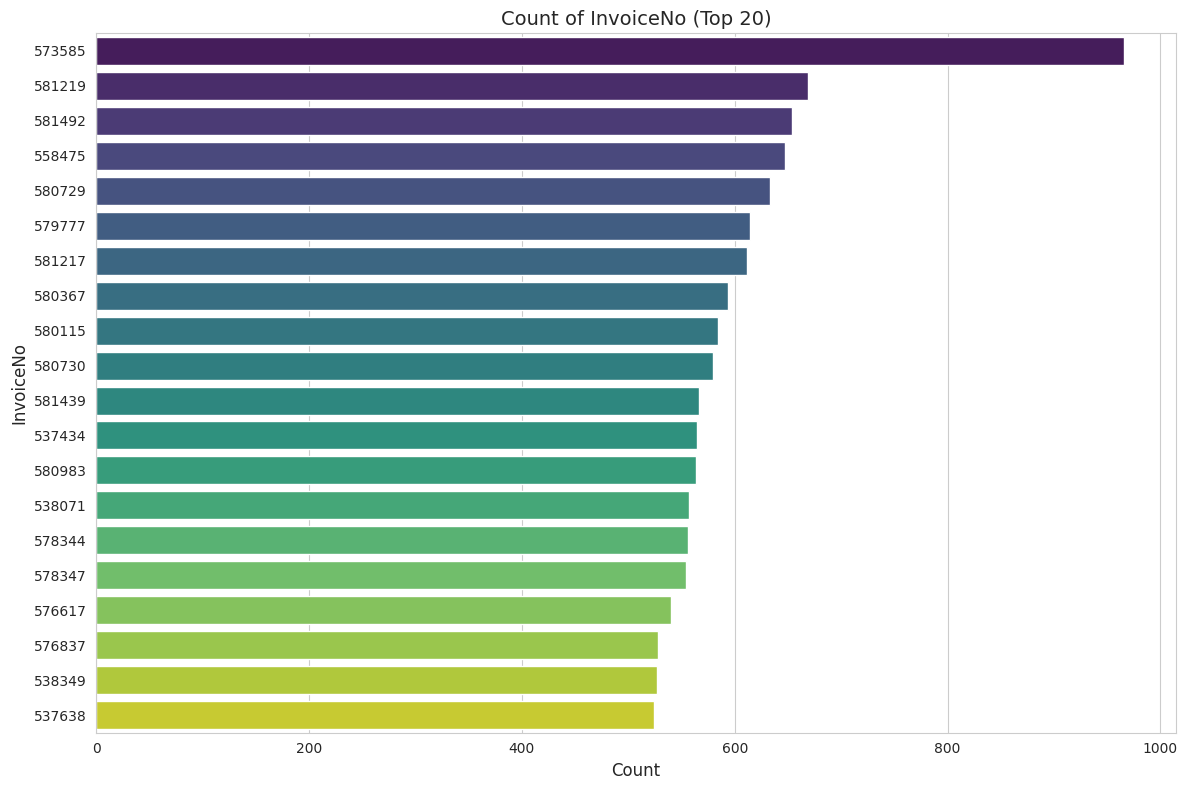

/tmp/ipython-input-10-3295214366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


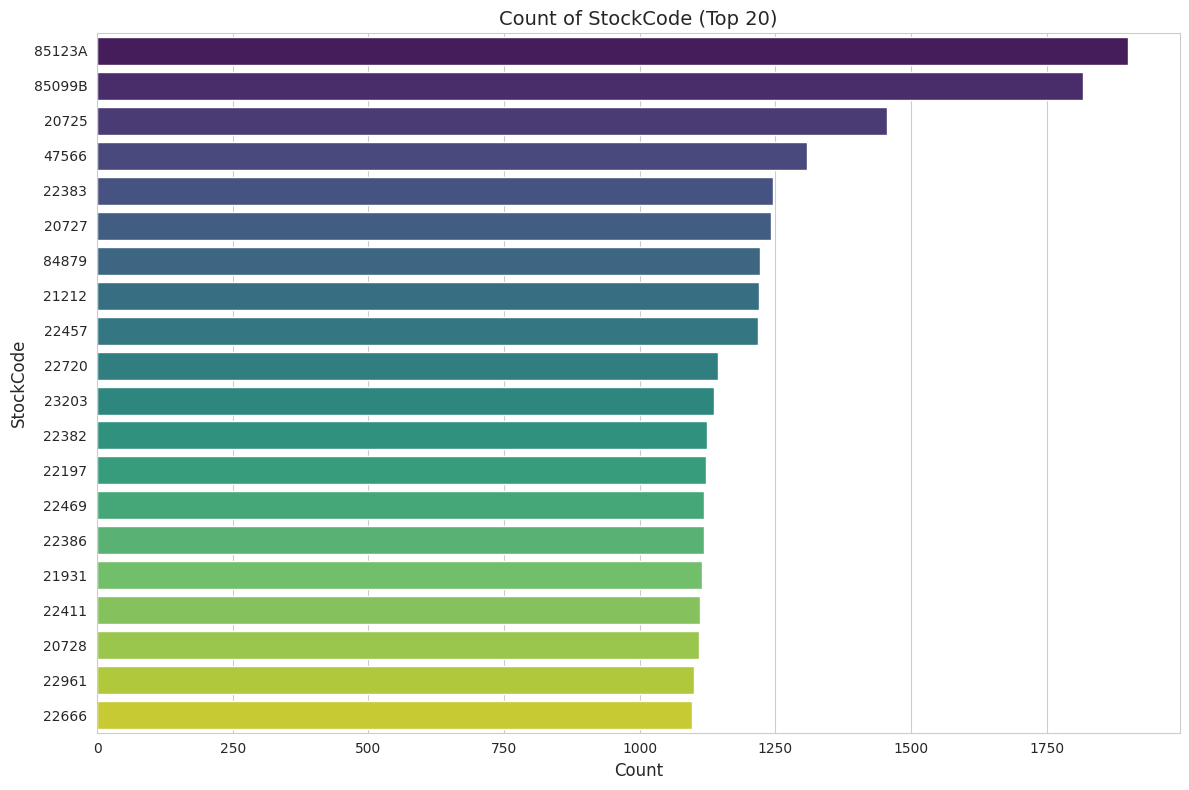

/tmp/ipython-input-10-3295214366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


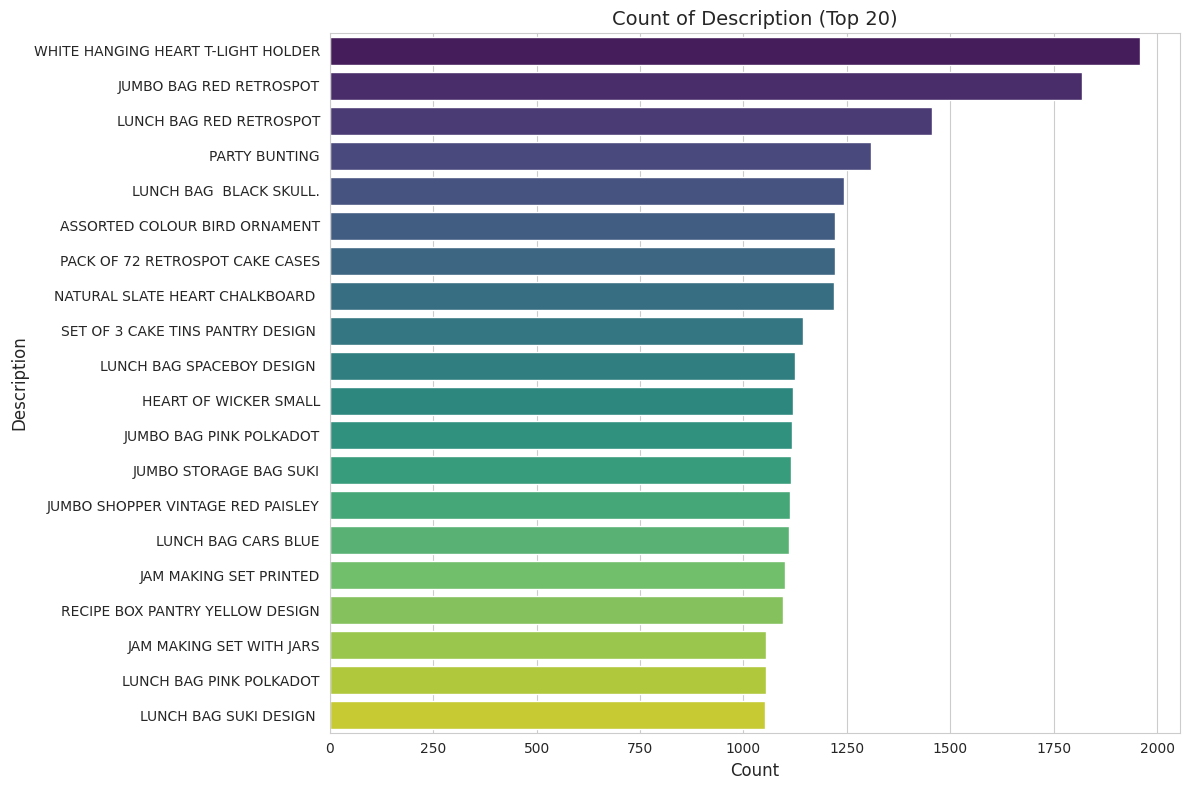

/tmp/ipython-input-10-3295214366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


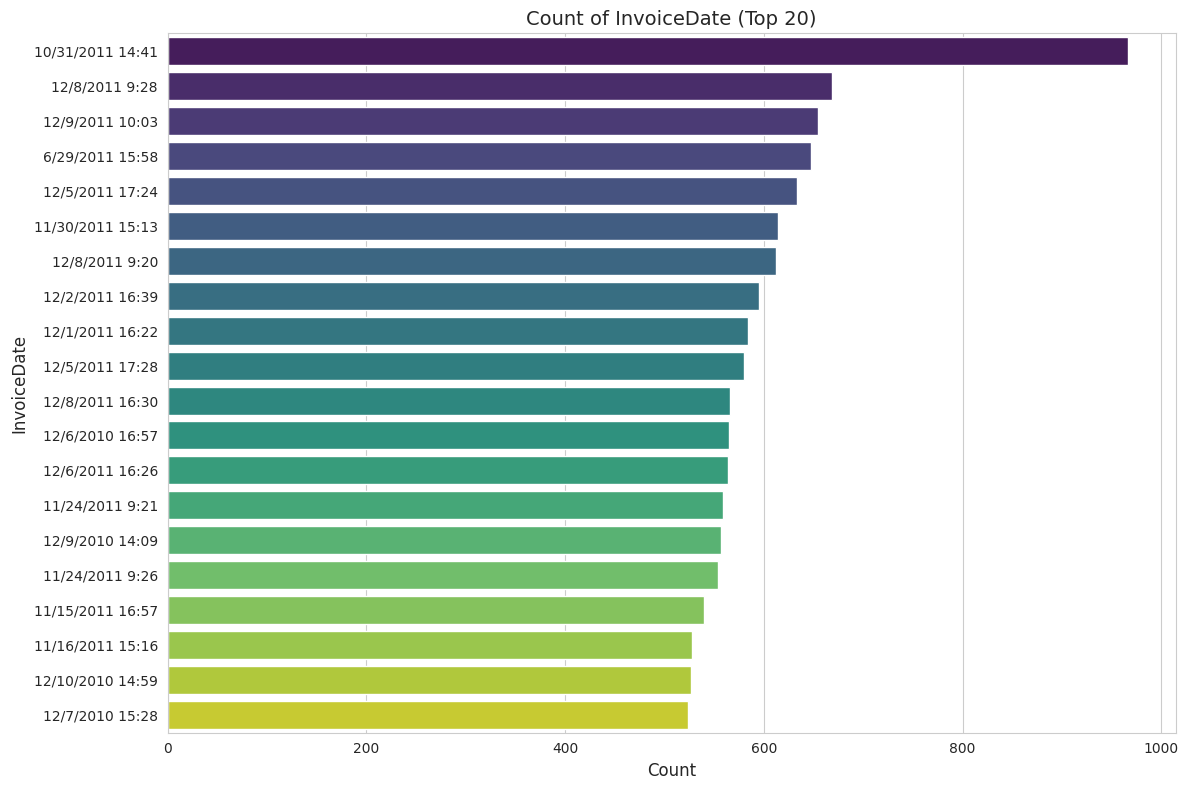

/tmp/ipython-input-10-3295214366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


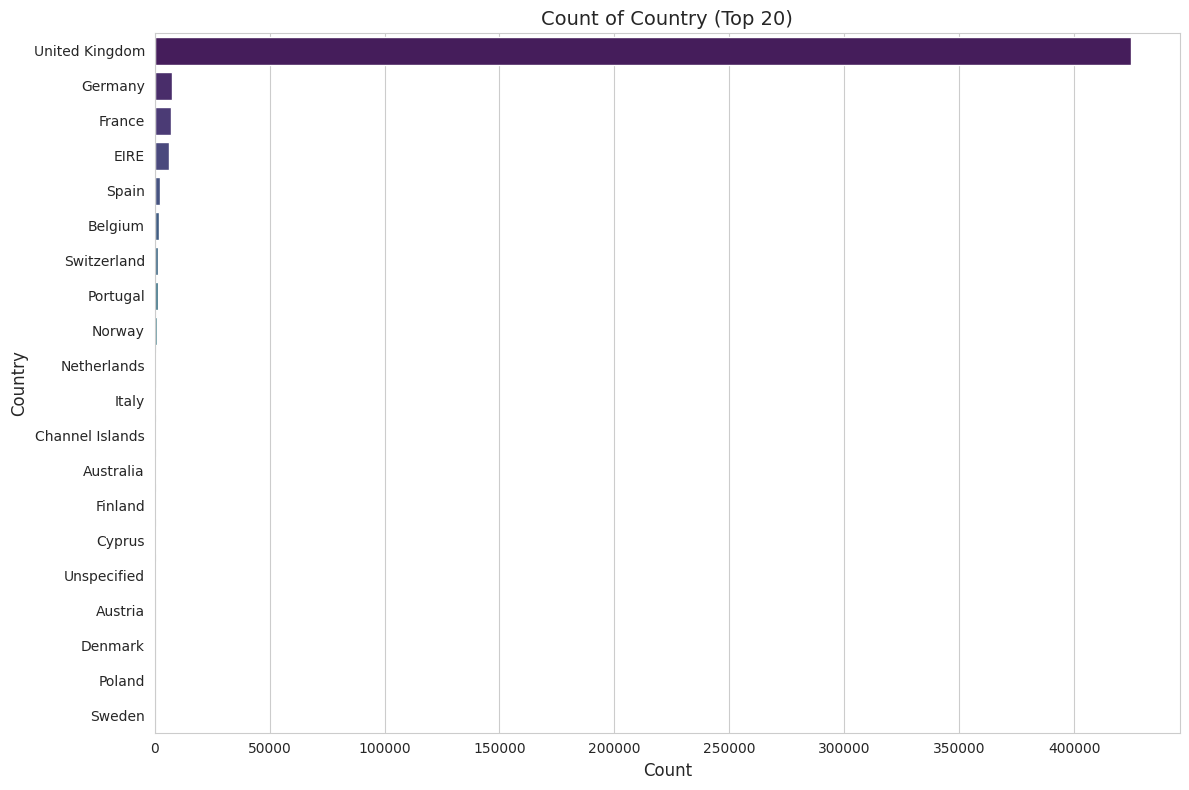

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for the plots
sns.set_style("whitegrid")

# Get numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Plot numerical columns
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure size for better readability

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Value', fontsize=12)


    # Histplot
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)


    plt.tight_layout()
    plt.show()

# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12, 8)) # Increased figure size
    # Limit to top 20 categories for better readability
    top_categories = df[col].value_counts().nlargest(20).index
    sns.countplot(y=df[col], order=top_categories, palette='viridis')
    plt.title(f'Count of {col} (Top 20)', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
import torch
import timesfm

# For PyTorch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend='pytorch',
          per_core_batch_size=32,
          horizon_len=128,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=50,
          model_dims=1280,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0].


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

torch_model.ckpt:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

In [ ]:
def prepare_data_for_timesfm(df):
    """
    Prepares the e-commerce data for time series forecasting with TimesFM.

    This function converts the 'InvoiceDate' to datetime objects, aggregates
    the data daily, and transforms it into a long format suitable for TimesFM
    inputs.

    Args:
        df: pandas DataFrame containing the raw e-commerce data with
            'InvoiceDate', 'Quantity', and 'UnitPrice' columns.

    Returns:
        pandas DataFrame: Prepared DataFrame with 'unique_id', 'ds', and 'y'
                          columns, sorted by 'unique_id' and 'ds'.
    """
    # Convert 'InvoiceDate' to datetime objects
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Aggregate data by day, summing Quantity and averaging UnitPrice
    daily_aggregated_data = df.groupby(df['InvoiceDate'].dt.date).agg(
        TotalQuantity=('Quantity', 'sum'),
        AverageUnitPrice=('UnitPrice', 'mean')
    ).reset_index()

    # Convert the 'InvoiceDate' column back to datetime objects after aggregation
    daily_aggregated_data['InvoiceDate'] = pd.to_datetime(daily_aggregated_data['InvoiceDate'])

    # Rename the date column to 'ds' as required by the forecasting model
    daily_aggregated_data.rename(columns={'InvoiceDate': 'ds'}, inplace=True)

    # Prepare the data in a long format with 'unique_id', 'ds', and 'y' columns
    # Create a unique_id for each metric ('quantity' and 'unit_price')
    quantity_ts = daily_aggregated_data[['ds', 'TotalQuantity']].copy()
    quantity_ts['unique_id'] = 'quantity'
    quantity_ts.rename(columns={'TotalQuantity': 'y'}, inplace=True)

    unit_price_ts = daily_aggregated_data[['ds', 'AverageUnitPrice']].copy()
    unit_price_ts['unique_id'] = 'unit_price'
    unit_price_ts.rename(columns={'AverageUnitPrice': 'y'}, inplace=True)

    # Concatenate the two time series
    prepared_df = pd.concat([quantity_ts, unit_price_ts])

    # Sort by unique_id and ds
    prepared_df.sort_values(by=['unique_id', 'ds'], inplace=True)

    return prepared_df

# Call the function to prepare the data
prepared_df = prepare_data_for_timesfm(df)

# Display the prepared data
print("Prepared Data for Forecasting:")
display(prepared_df.head())
display(prepared_df.info())

Prepared Data for Forecasting:


,ds,y,unique_id
0,2010-12-01,13054.0,quantity
1,2010-12-02,12766.0,quantity
2,2010-12-03,8789.0,quantity
3,2010-12-05,10891.0,quantity
4,2010-12-06,14176.0,quantity


<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 0 to 304
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         610 non-null    datetime64[ns]
 1   y          610 non-null    float64       
 2   unique_id  610 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.1+ KB


None

In [ ]:
forecast_df = tfm.forecast_on_df(
    inputs=prepared_df, # Changed from df to prepared_df
    freq="D",  # Changed from "M" to "D" as we aggregated by day
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [ ]:
print("Forecast Data:")
display(forecast_df)

Forecast Data:


,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,quantity,2011-12-10,12790.532227,8162.333008,9803.028320,10928.566406,11876.160156,12790.532227,13675.953125,14579.085938,15571.137695,16955.990234
1,quantity,2011-12-11,16309.346680,11646.863281,13282.210938,14424.253906,15387.328125,16309.346680,17208.658203,18100.794922,19125.314453,20519.689453
2,quantity,2011-12-12,15848.351562,11362.945312,12902.404297,13984.759766,14932.054688,15848.351562,16726.923828,17622.601562,18692.632812,20079.273438
3,quantity,2011-12-13,15611.936523,10974.080078,12551.853516,13680.125977,14676.125000,15611.936523,16531.710938,17459.595703,18513.710938,19985.425781
4,quantity,2011-12-14,16488.839844,11929.647461,13487.123047,14617.124023,15590.179688,16488.839844,17394.183594,18295.871094,19335.042969,20785.960938
...,...,...,...,...,...,...,...,...,...,...,...,...
251,unit_price,2012-04-11,2.527936,2.237003,2.333580,2.405712,2.468634,2.527936,2.587877,2.653612,2.733820,2.849566
252,unit_price,2012-04-12,2.523867,2.230514,2.326659,2.400375,2.462039,2.523867,2.584777,2.649017,2.730644,2.847685
253,unit_price,2012-04-13,2.538114,2.241896,2.338609,2.412711,2.476373,2.538114,2.599876,2.666980,2.749740,2.869535
254,unit_price,2012-04-14,2.527459,2.238003,2.332929,2.406794,2.467716,2.527459,2.589753,2.657659,2.736100,2.855677


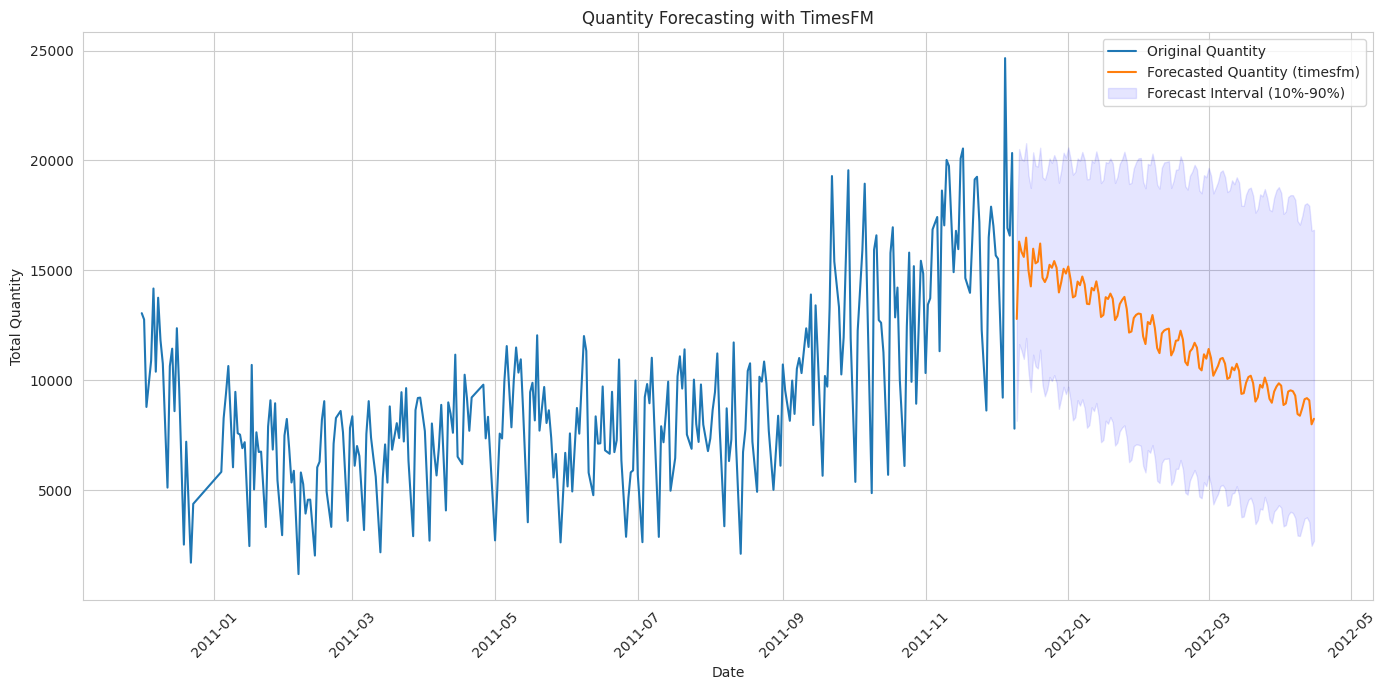

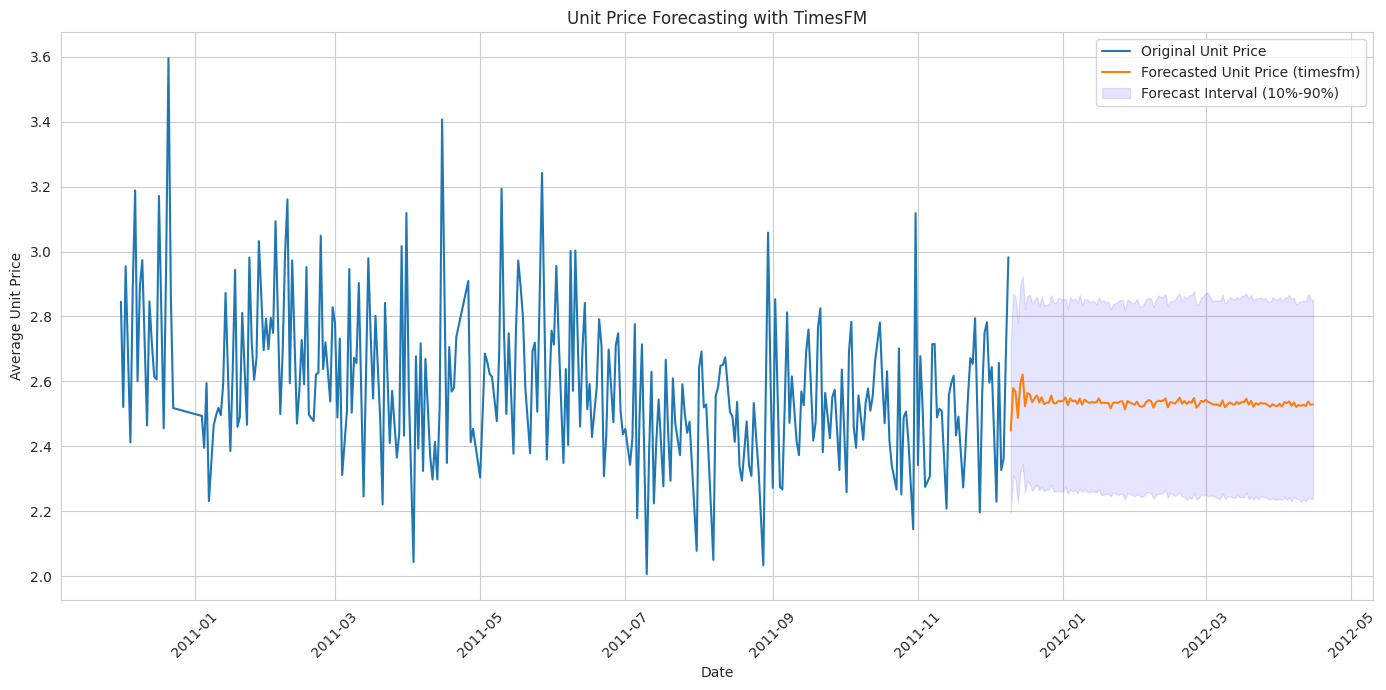

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the forecast data for Quantity and UnitPrice
forecast_quantity_df = forecast_df[forecast_df['unique_id'] == 'quantity'].copy()
forecast_unit_price_df = forecast_df[forecast_df['unique_id'] == 'unit_price'].copy()

# Separate the original data for plotting
original_quantity_df = prepared_df[prepared_df['unique_id'] == 'quantity'].copy()
original_unit_price_df = prepared_df[prepared_df['unique_id'] == 'unit_price'].copy()


# Plot the forecast for Quantity
plt.figure(figsize=(14, 7))
sns.lineplot(data=original_quantity_df, x='ds', y='y', label='Original Quantity')
sns.lineplot(data=forecast_quantity_df, x='ds', y='timesfm', label='Forecasted Quantity (timesfm)')
plt.fill_between(forecast_quantity_df['ds'], forecast_quantity_df['timesfm-q-0.1'], forecast_quantity_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
plt.title('Quantity Forecasting with TimesFM')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the forecast for UnitPrice
plt.figure(figsize=(14, 7))
sns.lineplot(data=original_unit_price_df, x='ds', y='y', label='Original Unit Price')
sns.lineplot(data=forecast_unit_price_df, x='ds', y='timesfm', label='Forecasted Unit Price (timesfm)')
plt.fill_between(forecast_unit_price_df['ds'], forecast_unit_price_df['timesfm-q-0.1'], forecast_unit_price_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
plt.title('Unit Price Forecasting with TimesFM')
plt.xlabel('Date')
plt.ylabel('Average Unit Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_mse(actual, predicted):
  return mean_squared_error(actual, predicted)

def calculate_mae(actual, predicted):
  return mean_absolute_error(actual, predicted)

def calculate_rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))


print("Functions to calculate MSE, MAE, and RMSE created.")

Functions to calculate MSE, MAE, and RMSE created.


In [ ]:
if len(prepared_df) > 30:
    actual_test_quantity = prepared_df[prepared_df['unique_id'] == 'quantity']['y'].tail(30)
    predicted_test_quantity = forecast_quantity_df['timesfm'].head(30) # Assuming the first 30 forecasts correspond to the test period

    actual_test_unit_price = prepared_df[prepared_df['unique_id'] == 'unit_price']['y'].tail(30)
    predicted_test_unit_price = forecast_unit_price_df['timesfm'].head(30) # Assuming the first 30 forecasts correspond to the test period

    # Ensure the lengths match (important for real evaluation)
    min_len_quantity = min(len(actual_test_quantity), len(predicted_test_quantity))
    actual_test_quantity = actual_test_quantity.iloc[:min_len_quantity]
    predicted_test_quantity = predicted_test_quantity.iloc[:min_len_quantity]

    min_len_unit_price = min(len(actual_test_unit_price), len(predicted_test_unit_price))
    actual_test_unit_price = actual_test_unit_price.iloc[:min_len_unit_price]
    predicted_test_unit_price = predicted_test_unit_price.iloc[:min_len_unit_price]


    print("--- Evaluation Metrics (Demonstration) ---")

    # Evaluate Quantity forecasts
    mse_quantity = calculate_mse(actual_test_quantity, predicted_test_quantity)
    mae_quantity = calculate_mae(actual_test_quantity, predicted_test_quantity)
    rmse_quantity = calculate_rmse(actual_test_quantity, predicted_test_quantity)

    print(f"\nQuantity Forecast Evaluation:")
    print(f"  MSE: {mse_quantity}")
    print(f"  MAE: {mae_quantity}")
    print(f"  RMSE: {rmse_quantity}")

    # Evaluate Unit Price forecasts
    mse_unit_price = calculate_mse(actual_test_unit_price, predicted_test_unit_price)
    mae_unit_price = calculate_mae(actual_test_unit_price, predicted_test_unit_price)
    rmse_unit_price = calculate_rmse(actual_test_unit_price, predicted_test_unit_price)

    print(f"\nUnit Price Forecast Evaluation:")
    print(f"  MSE: {mse_unit_price}")
    print(f"  MAE: {mae_unit_price}")
    print(f"  RMSE: {rmse_unit_price}")

else:
    print("Not enough data points to create a meaningful test set for this demonstration.")

--- Evaluation Metrics (Demonstration) ---

Quantity Forecast Evaluation:
  MSE: 15015127.52401034
  MAE: 3141.2589192708333
  RMSE: 3874.9358090180463

Unit Price Forecast Evaluation:
  MSE: 0.033711241132302096
  MAE: 0.1512674497148333
  RMSE: 0.1836062121288441


In [ ]:
def plot_forecasts():
    """Generates and returns plots for Quantity and Unit Price forecasts."""

    # Plot the forecast for Quantity
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=original_quantity_df, x='ds', y='y', label='Original Quantity')
    sns.lineplot(data=forecast_quantity_df, x='ds', y='timesfm', label='Forecasted Quantity (timesfm)')
    plt.fill_between(forecast_quantity_df['ds'], forecast_quantity_df['timesfm-q-0.1'], forecast_quantity_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
    plt.title('Quantity Forecasting with TimesFM')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    quantity_fig = plt.gcf() # Get the current figure
    plt.close() # Close the figure to prevent it from displaying immediately

    # Plot the forecast for UnitPrice
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=original_unit_price_df, x='ds', y='y', label='Original Unit Price')
    sns.lineplot(data=forecast_unit_price_df, x='ds', y='timesfm', label='Forecasted Unit Price (timesfm)')
    plt.fill_between(forecast_unit_price_df['ds'], forecast_unit_price_df['timesfm-q-0.1'], forecast_unit_price_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
    plt.title('Unit Price Forecasting with TimesFM')
    plt.xlabel('Date')
    plt.ylabel('Average Unit Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    unit_price_fig = plt.gcf() # Get the current figure
    plt.close() # Close the figure to prevent it from displaying immediately


    return quantity_fig, unit_price_fig

print("Function to plot forecasts created.")

Function to plot forecasts created.


In [ ]:
interface = gr.Interface(
    fn=plot_forecasts,
    inputs=[],
    outputs=[gr.Plot(), gr.Plot()],
    title="TimesFM Forecast Visualization"
)

In [ ]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://62ca2858505b6733d3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
